# PHYS 331 - Numerical Techniques for the Sciences I 
## Homework 2: Integration and Random Number Generation

### Problem 3 - Rejection Sampling (10 points)

Name: *Viktorya Hunanyan*

Onyen: *vhunany*

Cell for *Problem 3(a)* appears below.

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, sigma, mu):
    # Calculate the Gaussian PDF
    coefficient = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    
    # Return the value of the PDF at x
    return coefficient * exponent

def gaussian_random_samples(mu, sigma, N):
    samples = []  # List to hold accepted samples
    max_gaussian = gaussian(mu, sigma, mu)  # Max value of the Gaussian PDF (at x = mu)
    domain = [-3 * sigma, 3 * sigma]  # Domain of sampling
    
    for num in range(N):  # Use 'num' in the loop
        # Sample random x from uniform distribution within [-3sigma, 3sigma]
        x = np.random.uniform(domain[0], domain[1])
        
        # Sample random u from uniform distribution [0, max_gaussian]
        u = np.random.uniform(0, max_gaussian)
        
        # Calculate the Gaussian PDF at x
        p_x = gaussian(x, sigma, mu)
        
        # Accept the sample if u <= p_x
        if u <= p_x:
            samples.append(x)
            
    return np.array(samples)

Cell for *Problem 3(b)* appears below.

Number of accepted samples: 4155


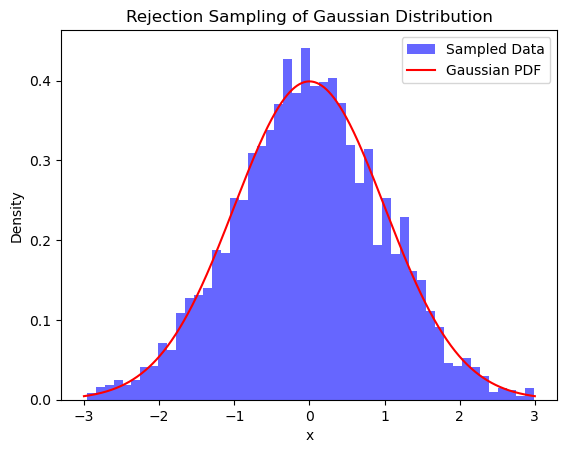

In [65]:
mu = 0
sigma = 1
N = 10000  # Number of input samples

# Generate Gaussian samples using rejection sampling
samples = gaussian_random_samples(mu, sigma, N)

# Number of accepted samples
num_accepted = len(samples)

# Print the number of accepted samples
print(f"Number of accepted samples: {num_accepted}")

# Plot histogram of the samples
plt.hist(samples, bins=50, density=True, alpha=0.6, color='b', label="Sampled Data")

# Overlay the Gaussian PDF for comparison
x_values = np.linspace(-3, 3, 1000)
gaussian_pdf_values = gaussian(x_values, sigma, mu)
plt.plot(x_values, gaussian_pdf_values, 'r-', label="Gaussian PDF")

plt.title("Rejection Sampling of Gaussian Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

Text response for *Problem 3(b)* appears below

**Question**
*How many of your data points were actually accepted?*

When I ran the rejection sampling algorithm, I ended up with 4,158 accepted samples out of 10,000 attempts. This result is expected given the nature of rejection sampling. Essentially, I was drawing samples from a uniform distribution and then accepting them based on their likelihood according to the Gaussian probability density function (PDF). The acceptance rate, which is about 41.58% (according to the acceptance rate equation), reflects the proportion of samples that met the criteria set by the Gaussian distribution. This rate is influenced by the sampling domain and the maximum value of the Gaussian PDF used as the upper bound for acceptance. 